In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
train = pd.read_csv('train.csv')
train.set_index('time')

,signal,open_channels
time,,
0.0001,-2.7600,0
0.0002,-2.8557,0
0.0003,-2.4074,0
0.0004,-3.1404,0
0.0005,-3.1525,0
...,...,...
499.9996,2.9194,7
499.9997,2.6980,7
499.9998,4.5164,8


since data is in batches of 50 sec there will be 10 batches of 50 sec each

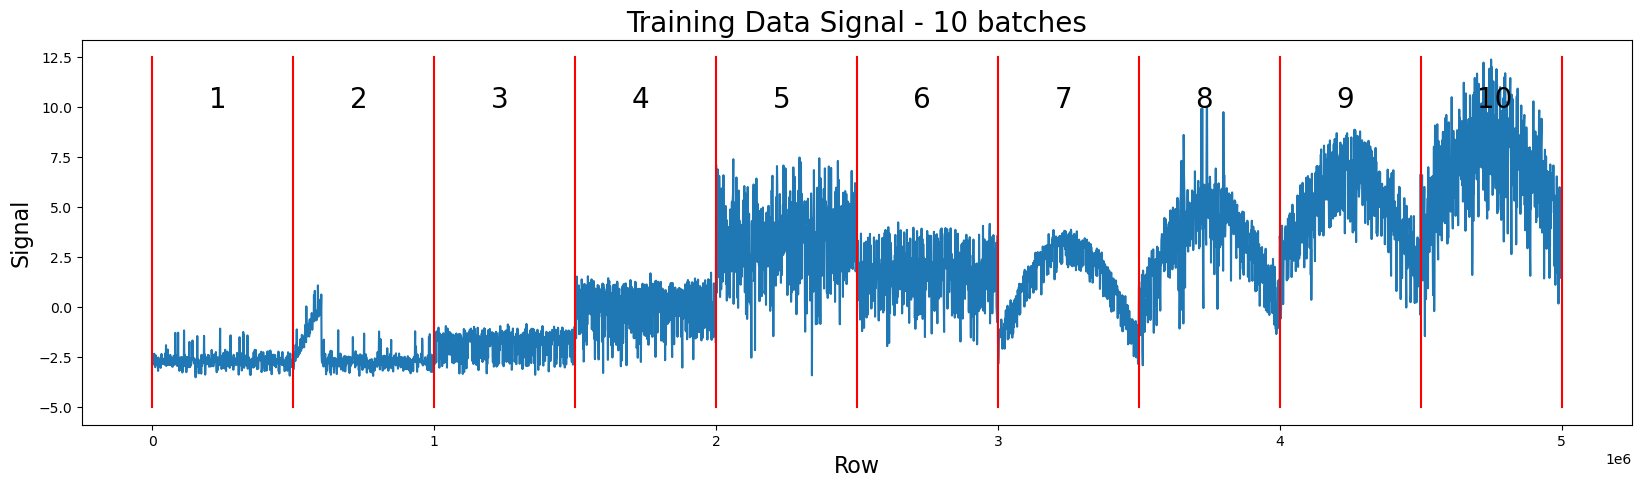

In [225]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.signal[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Signal',size=16); 
plt.title('Training Data Signal - 10 batches',size=20)
plt.show()

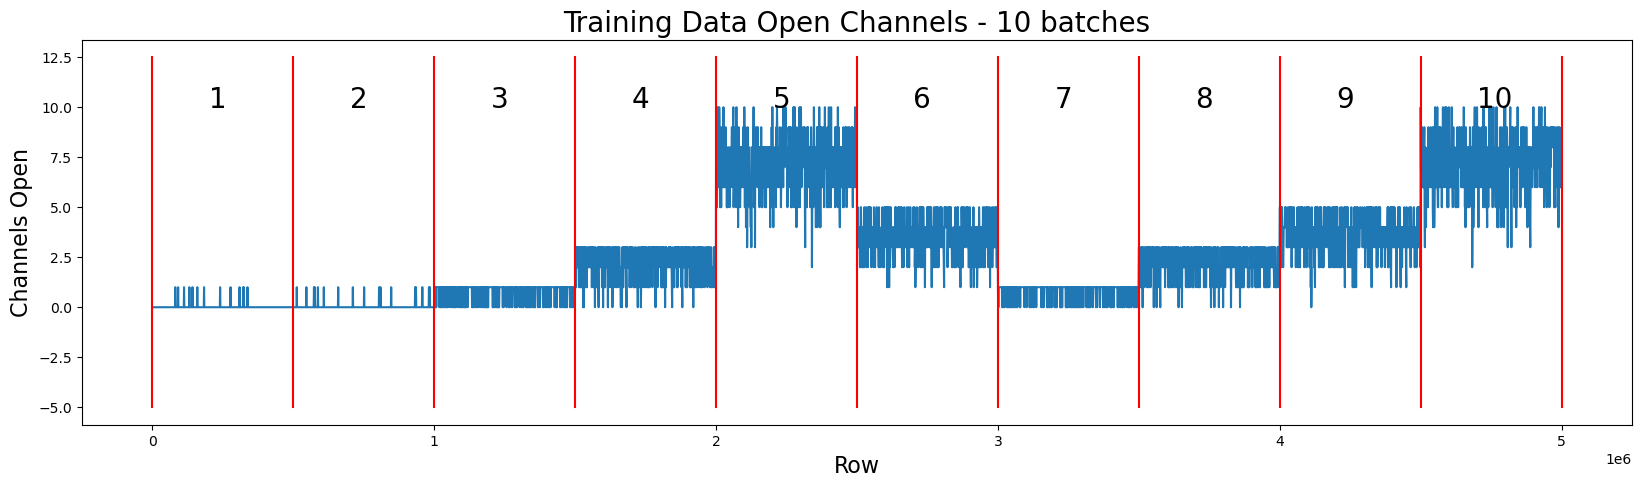

In [226]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.open_channels[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Training Data Open Channels - 10 batches',size=20)
plt.show()

In [227]:
Batch1 = train[:500000]

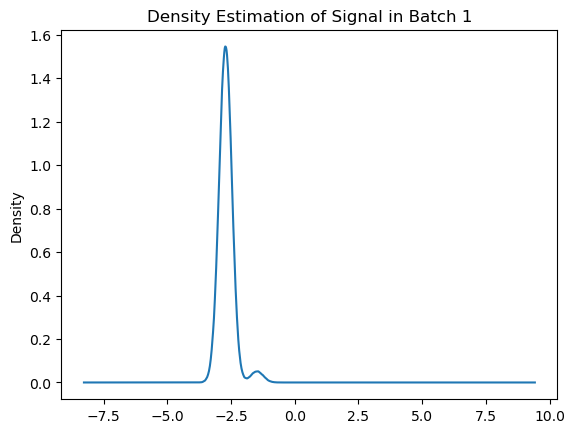

In [228]:
pd.Series(Batch1['signal']).plot(kind='density', title='Density Estimation of Signal in Batch 1')
plt.show()

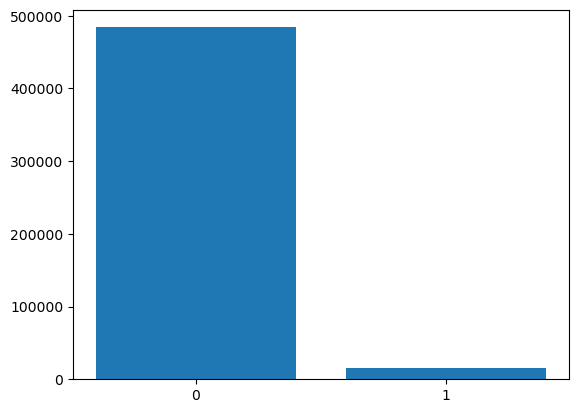

In [229]:
open_channel_count, freq = np.unique(Batch1['open_channels'], return_counts=True)
plt.bar(open_channel_count, freq)
plt.xticks([0,1])
plt.show()

throgh this EDA we learn that their are 2 states i.e. 0 channel open and 1 channel open 

In [230]:
from hmmlearn import hmm
import deepchem as dc

In [231]:
train_batch1 = np.array([np.array(Batch1['signal']).reshape(-1,1)])
# this is done to convert data into 3d matrix such that train_batch[i][j][k] is i-th sequence, j-th timestep, k-th feature
train_batch1


array([[[-2.76  ],
        [-2.8557],
        [-2.4074],
        ...,
        [-2.9536],
        [-2.7725],
        [-2.8171]]], shape=(1, 500000, 1))

In [232]:
model = hmm.GaussianHMM(n_components=2, n_iter=100)
dc_model = dc.models.hmmlearn_models.HmmlearnModel(model)
dataset = dc.data.NumpyDataset(train_batch1)

In [233]:
dc_model.fit(dataset)

[500000]


In [234]:
res = dc_model.predict(dataset)

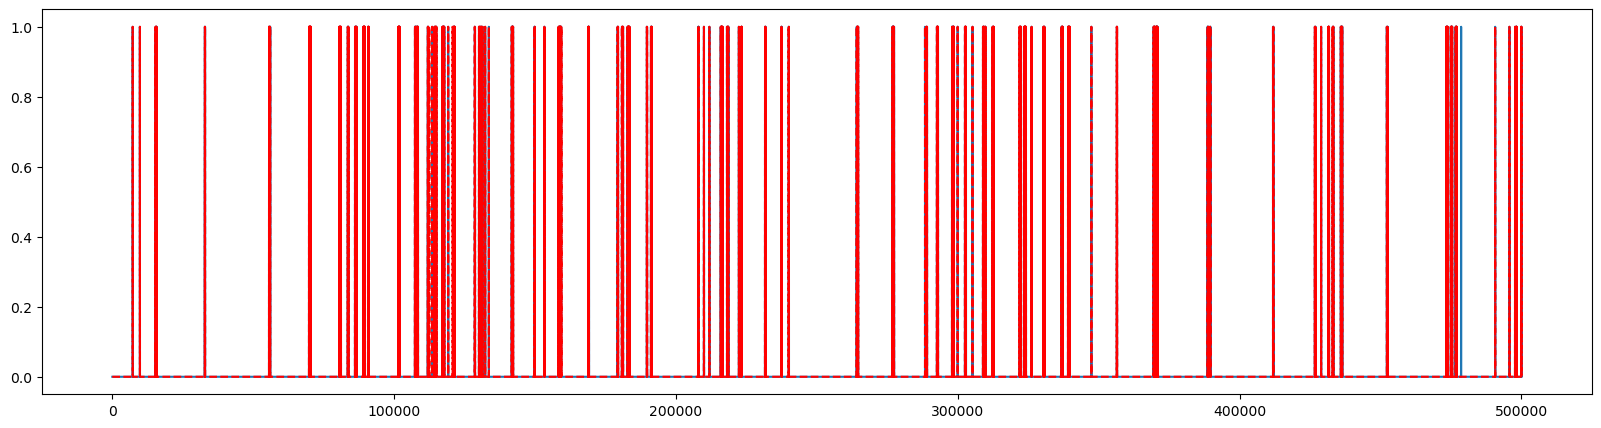

In [235]:
plt.figure(figsize=(20,5));
plt.plot(range(0,500000),res)
plt.plot(range(0,500000),Batch1['open_channels'],'r--')

In [236]:
dc_model.score(dataset)

-34743.32865070047

In [237]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Batch1['open_channels'], res)
cm


array([[478442,   5692],
       [    19,  15847]])

In [238]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(Batch1['open_channels'], res)
f1 = f1_score(Batch1['open_channels'], res, average="macro")
print(accuracy, f1)


0.988578 0.9206934780576403
